<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اضافه‌کردن ویژگی‌های جدید
</font>
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یکی از کارهای جذابی که در چنین کارهای تحلیلی می‌توان انجام داد، ساخت ویژگی جدید بر اساس ویژگی‌های موجود می‌باشد. البته شرط این‌کار، مفید بودن ویژگی جدید می‌باشد.
</font>
</p>

<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
φ is latitude
<br>
λ is longitude
<br>
Distance = acos(sinφ1*sinφ2 + cosφ1*cosφ2 * cos(λ2-λ1)) * 6371.0088
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طول جغرافیایی (longitude) و عرض جغرافیایی (latitude) مرکز پایتخت چین به ترتیب 116.4074 و 39.9042 می‌باشد. فاصله هر خانه تا مرکز پایتخت چین را محاسبه کنید و در ستونی به اسم <code>distanceToCapital</code> ذخیره کنید. دقت کنید که در محاسبات، باید همه زاویه ها را به رادیان تبدیل کنید. نام دیتافریم جدید که شامل این ستون است را <code>housing_capital</code> قرار دهید.
<br>
<br>
راهنمایی:‌ محاسبات را با نامپای انجام دهید.
</font>
</p>


In [2]:
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

cos_capt_lng = np.cos(capital_Lng)

sin_capt_lat = np.sin(capital_Lat)
cos_capt_lat = np.cos(capital_Lat)    

housing_capital = housing_no_outlier.copy()

housing_capital['sin_lat'] = housing_capital.Lat.apply(lambda val : np.sin(radians(val)))
housing_capital['cos_lat'] = housing_capital.Lat.apply(lambda val : np.cos(radians(val)))
housing_capital['cos_lng_capt'] = housing_capital.Lng.apply(lambda val : np.cos(capital_Lng - radians(val)))
                                                       
housing_capital['distanceToCapital'] = np.arccos(housing_capital['sin_lat'] * sin_capt_lat + 
                                                 housing_capital['cos_lat'] * cos_capt_lat * 
                                                 housing_capital['cos_lng_capt']) * 6371.0088

housing_capital.drop(columns=['sin_lat','cos_lat','cos_lng_capt'],inplace=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مجموعه داده، قیمت معامله شده و متراژ هر خانه مشخص است. اما قیمت هر متر مربع خانه مشخص نیست. در ستون <code>pricePerSquare</code> قیمت هر متر مربع خانه را محاسبه و ذخیره کنید. توجه کنید که قیمت کلی بر اساس میلیون یوان است. پس قیمتی که برای هر مترمربع از خانه حساب می‌کنید، باید در هزار ضرب شود تا قیمت بر اساس یوان به دست آید. نام دیتافریم حاصل را برابر <code>housing_PPS</code> قرار دهید.
</font>
</p>


In [3]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = (housing_PPS['totalPrice'] / housing_PPS['square']) * 1000


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم با مصور‌سازی داده به روشهای گوناگون، اطلاعاتی متناسب با نیاز های خود استخراج کنیم. داده ما نه مقدار گمشده دارد، نه داده پرت دارد، و نه ستون‌هایی که با فرمت نامناسب ذخیره شده‌ باشند. در اولین قدم نگاهی به هیستوگرام ستون های عددی می‌اندازیم.
<br>
برای داشتن جدولی از هیستوگرام همه ستون‌های عددی، باید از تابع <code>hist</code> ‌استفاده کنیم. دقت کنید که تابع hist با چیزی که در آموزش‌های مربوط به رابط پانداس دیده بودیم فرق دارد. <code>plot(kint = ‘hist’)</code> هیستوگرام همه ستون‌ها را بر روی یک صفجه محور می‌کشید اما تابع <code>hist</code> برای هر ستون یک صفحه محور جداگانه رسم می‌کند.
</font>
</p>

<ipython-input-4-ab8a8b9f14b5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  housing_PPS.hist(ax = ax, bins = 20);


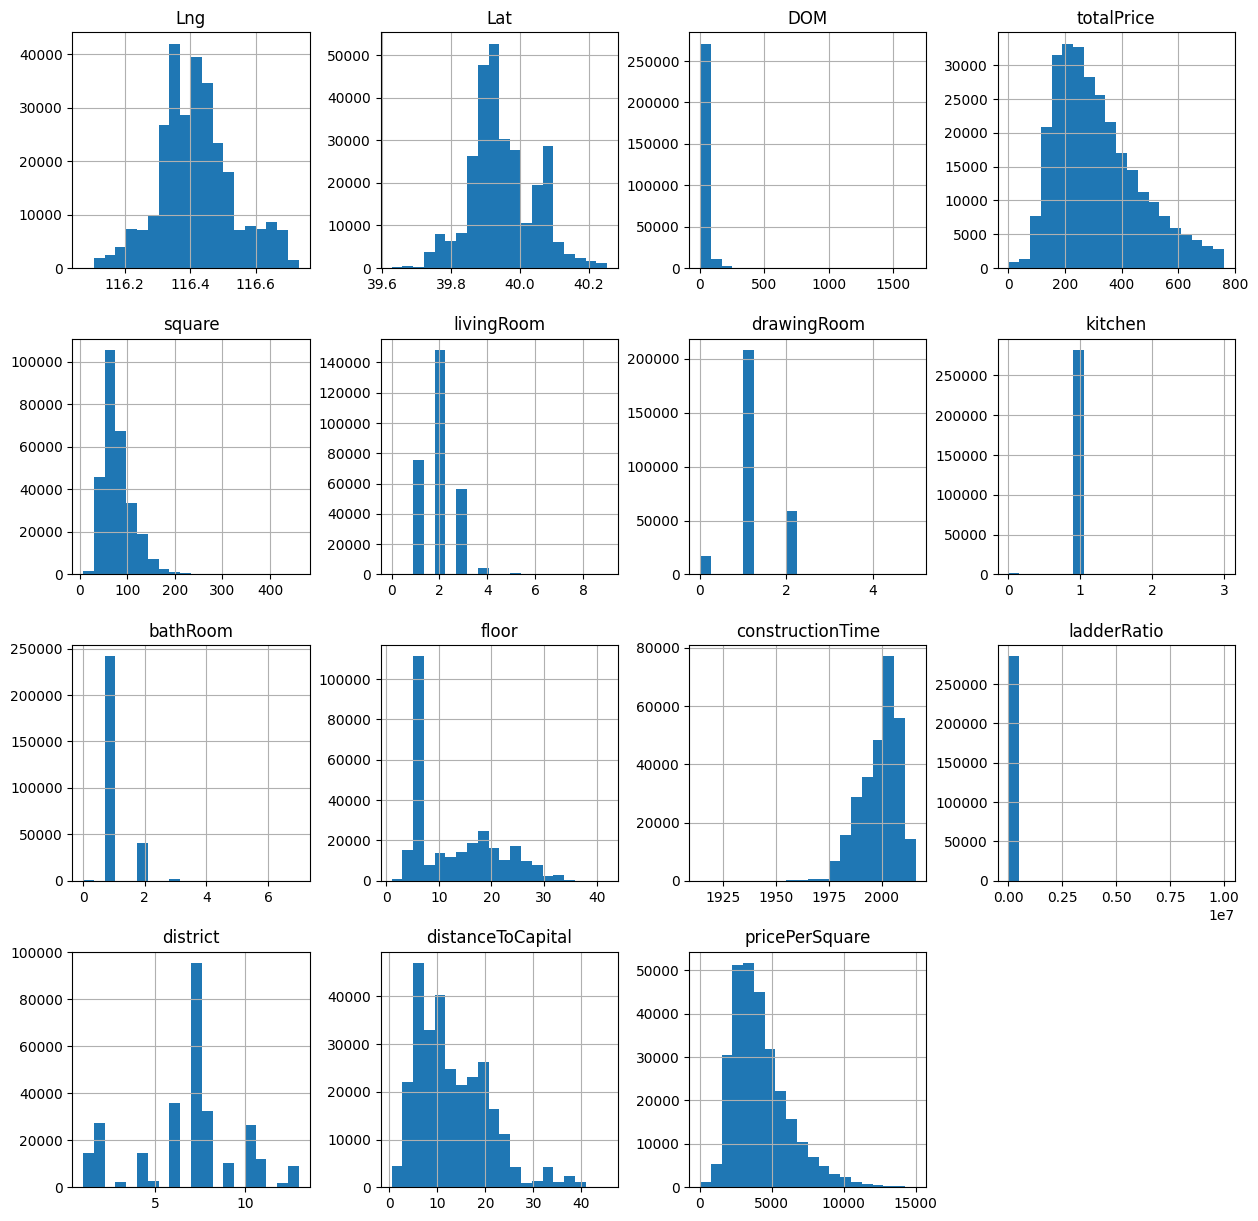

In [4]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

fig

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار بالا، قیمت خانه یک خمیدگی به سمت قیمت ۲۰۰ میلیون یووان دارد. اکثر خانه‌ها حوالی سال ۲۰۰۰ ساخته شده‌اند. بیشترین فاصله از مرکز پایتخت ۴۰ کیلومتر است. اکثر خانه‌ها دو اتاق هال دارند. می‌توان اطلاعات بیشتری از این نمودار بیرون کشید.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی تاثیر فاصله از مرکز بر روی قیمت‌ هر متر مربع</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم از ستون جدیدی که ساختیم استفاده کنیم و ببینیم که با دورشدن از مرکز شهر،‌قیمت هر متر مربع از خانه چگونه تغییر می‌کند. برای این‌کار می توان از نمودار <code>regplot</code>  سیبورن استفاده کرد که علاوه بر نمایش نقاط،‌ با رگرسیون روند داده را نشان می‌دهد.
<br>
(اجرای سلول زیر ممکن است چند دقیقه طول بکشد.)
</font>
</p>

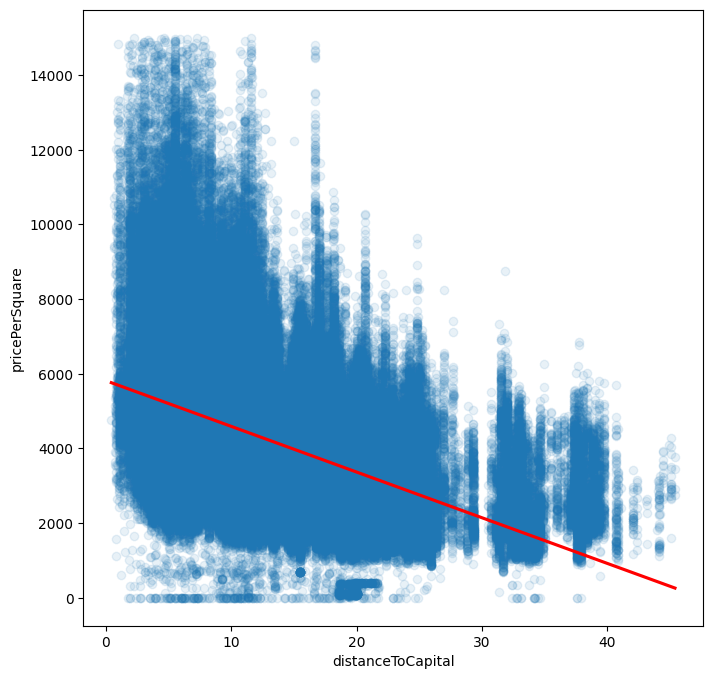

In [5]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

fig

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم بررسی کنیم که داشتن آسانسور چقد بر
<b>
 قیمت هر متر مربع
</b>
  خانه‌ها تاثیر دارد. برای این کار از نمودار‌های مختلفی می‌توان استفاده کرد. برای مثال با کمک نمودار میله‌ای می‌توان میانگین قیمت  خانه‌هایی که آسانسور دارند و آسانسور ندارند را مقایسه کرد یا با کمک نمودار جعبه‌ای می‌توان نموداری کشید که توزیع قیمت آنها را نشان دهد. ما از نمودار چگالی برای مقایسه استفاده می‌کنیم.
<br>
<ul style="direction: rtl;text-align: right;">
  <li>
ابتدا یک شکل شامل یک صفحه محور بسازید و اندازه طول و عرض شکل را برابر ۶ اینچ قرار دهید.
</li>
  <li>
با استفاده از رابط پانداس، نمودار تخمین توزیع قیمت را برای خانه‌های بدون آسانسور رسم کنید. این نمودار را بر روی صفحه محوری که در مرحله قبل ساختید رسم کنید.
</li>
  <li>
سپس نمودار تخمین توزیع قیمت را برای خانه‌های دارای آسانسور روی همان صفحه محور رسم کنید.
</li>


  <li>
تنظیمات را طوری تغییر دهید که خروجی شما دقیقا مانند شکل زیر شود. رنگ‌های استفاده شده:
<ul>
<li>
رنگ عنوان شکل:‌ <code>red</code>
</li>
<li>
رنگ زمینه صفحه محور: <code>#ffffcc</code>
</li>
<li>
رنگ زمینه شکل: <code>khaki</code>
</li>
</ul>
</font>
</p>

<p style="text-align:center;"><img src="output.png"></p>

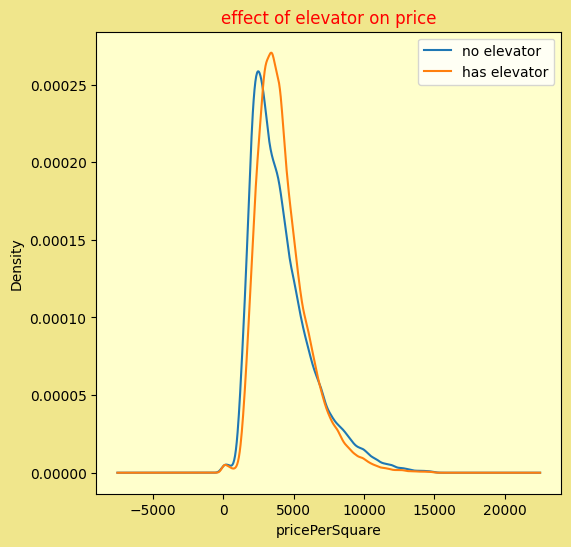

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

housing_PPS[housing_PPS.elevator == 'no elevator'].pricePerSquare.plot(kind="kde",ax=ax,label='no elevator')
housing_PPS[housing_PPS.elevator == 'has elevator'].pricePerSquare.plot(kind="kde",ax=ax,label='has elevator')

ax.legend()

ax.set_title("effect of elevator on price",color='red')
ax.set_xlabel('pricePerSquare')
ax.set_facecolor('#ffffcc')
fig.set_facecolor('khaki')

fig

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم <code>housing_extended</code> را برای استفاده در مرحله بعد ذخیره می‌کنیم.
</font>
</p>

In [7]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [8]:
import zipfile
import joblib
import nbformat as nbf

ntbk = nbf.read("3_add_new_features.ipynb", nbf.NO_CONVERT)
new_ntbk = ntbk
for cell in ntbk.cells:
    cell['outputs']=[]
nbf.write(new_ntbk, "3_add_new_features_no_output.ipynb", version=nbf.NO_CONVERT)

joblib.dump(housing_capital.head(100),"housing_capital") 
joblib.dump(housing_PPS.head(100),"housing_PPS")
joblib.dump(fig,"fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["housing_capital","housing_PPS","fig", '3_add_new_features_no_output.ipynb']
compress(file_names)

File Paths:
['housing_capital', 'housing_PPS', 'fig', '3_add_new_features_no_output.ipynb']
